importamos todas las librerías y herramientas que se utilizarán para realizar el análisis completo del dataset.

In [96]:
from wget import download
from os import path, listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kstest
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [97]:
if not path.exists("online_shoppers_intention.csv"):
  download("https://raw.githubusercontent.com/FeliCosta16/OnlineShopperPurchasing/refs/heads/main/online_shoppers_intention.csv")
else:
  print("El archivo ya existe!")

El archivo ya existe!


In [98]:
# chequeamos si los archivos están en el directorio donde estamos parados.
lista_archivos = listdir("./")
print(f"El contenido de la carpeta es: {lista_archivos}")

El contenido de la carpeta es: ['.git', '.gitignore', 'investigacion.ipynb', 'online_shoppers_intention.csv', 'tpe']


In [99]:
# abrimos el archivo usando una función específica de pandas.
raw_dataset = pd.read_csv("online_shoppers_intention.csv")

raw_dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Realizamos el método info() para ver la cantidad de registros que tenemos, el número de columnas, la cantidad de valores nulos en ellas, y el tipo de dato (dtype) asociado a cada una.

In [100]:
# Analizamos el dataset.
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Usaremos el método head() para imprimir las primeras 5 filas del Dataset.

In [101]:
raw_dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Usaremos el método describe() para generar un resumen estadístico descriptivo de todas las columnas del Dataset.

In [102]:
raw_dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Aquí vamos a analizar presencia de outliers en columnas donde pueda llegar a ser interesante

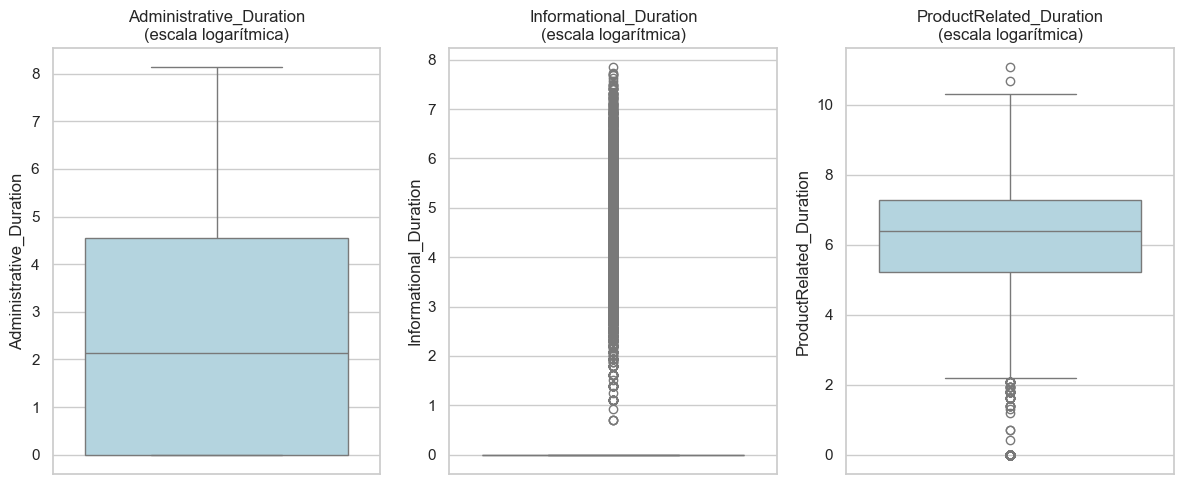

In [103]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=np.log1p(raw_dataset[col]), color="lightblue")
    plt.title(f"{col}\n(escala logarítmica)")
plt.tight_layout()
plt.show()

In [104]:
def contar_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    outliers = data[(data[col] < low) | (data[col] > high)]
    return len(outliers), low, high

for col in ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration",
            "BounceRates", "ExitRates", "PageValues"]:
    n_outliers, low, high = contar_outliers_iqr(raw_dataset, col)
    print(f"{col}: {n_outliers} outliers (fuera de [{low:.2f}, {high:.2f}])")


Administrative_Duration: 1172 outliers (fuera de [-139.88, 233.14])
Informational_Duration: 2405 outliers (fuera de [0.00, 0.00])
ProductRelated_Duration: 961 outliers (fuera de [-1735.89, 3384.19])
BounceRates: 1551 outliers (fuera de [-0.03, 0.04])
ExitRates: 1099 outliers (fuera de [-0.04, 0.10])
PageValues: 2730 outliers (fuera de [0.00, 0.00])


In [105]:
for col in ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration",
            "BounceRates", "ExitRates", "PageValues"]:
    n_outliers, low, high = contar_outliers_iqr(raw_dataset, col)
    perc = (n_outliers / len(raw_dataset)) * 100
    print(f"{col}: {n_outliers} outliers ({perc:.2f}% del total)")


Administrative_Duration: 1172 outliers (9.51% del total)
Informational_Duration: 2405 outliers (19.51% del total)
ProductRelated_Duration: 961 outliers (7.79% del total)
BounceRates: 1551 outliers (12.58% del total)
ExitRates: 1099 outliers (8.91% del total)
PageValues: 2730 outliers (22.14% del total)


Vamos a verificar la integridad de los datos para asegurarnos de que no haya errores de carga que puedan distorsionar el análisis.

In [106]:
# Esto es para ver si estas columnas que deberían tener valores entre [0,1] por estar normalizadas tienen algún error en la carga.
for col in ['BounceRates', 'ExitRates']:
    out_of_range = raw_dataset[(raw_dataset[col] < 0) | (raw_dataset[col] > 1)]
    print(f"{col}: {len(out_of_range)} valores fuera del rango [0,1]")

BounceRates: 0 valores fuera del rango [0,1]
ExitRates: 0 valores fuera del rango [0,1]


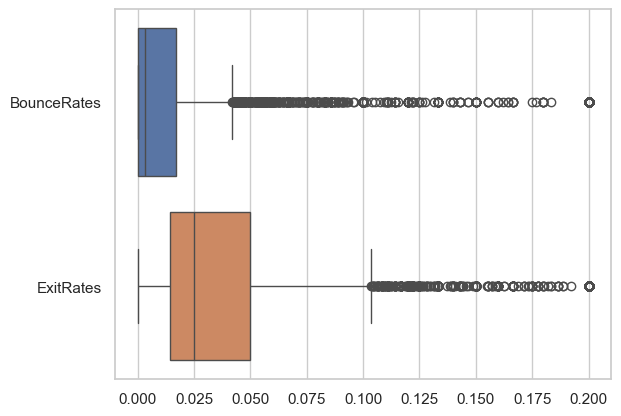

In [107]:
raw_dataset[['BounceRates', 'ExitRates']].describe()
sns.boxplot(data=raw_dataset[['BounceRates', 'ExitRates']], orient="h")
plt.show()

Usaremos el método describe() con el parámetro include='object' para obtener un resumen estadístico de estas columnas. Esto nos permite poder analizar valores únicos y que no haya errores en los tipos.

In [108]:
raw_dataset.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


Ahora usaremos el método unique() para listar explícitamente esos 10 valores presentes en la variable Month. Esto nos permitirá confirmar cuáles meses están presentes en el dataset y, por deducción, identificar los dos meses que faltan.

In [109]:
raw_dataset['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

Se puede ver que faltan los meses Abril y Enero. Estas no generan problemas pero a la hora de plantear las hipótesis no tendremos en cuenta estos meses. 

Observamos si nuestro Dataset contiene NaNs.

In [110]:
raw_dataset.isna().any().any()

np.False_

Miramos duplicados.

In [111]:
raw_dataset.duplicated().sum()

np.int64(125)

Se puede ver que hay 125 duplicados. Los cuales pueden llegar a generar problemas a la hora de analizar los datos. 
Dado que la probabilidad de que 17 columnas sean iguales es muy baja, y además de que en total las filas duplicadas son 125 (que comparado con las 12330 muestras de la población total), este es un número que no va a generar problemas si se los elimina.

Generamos una copia del dataset original que elimine los duplicados encontrados.

In [112]:
df_original=raw_dataset.copy()

df_no_duplicados = raw_dataset.drop_duplicates()

Ahora estamos en condiciones de comenzar con las pruebas de las hipótesis.

Vamos a comenzar con las univariadas.

*Hipotesis univariada 1:* “La mayoría de los visitantes son 'Returning_Visitor' .”

En primer lugar realizamos un grafico de torta para visualizar los porcentajes de los distintos tipos de visitantes.

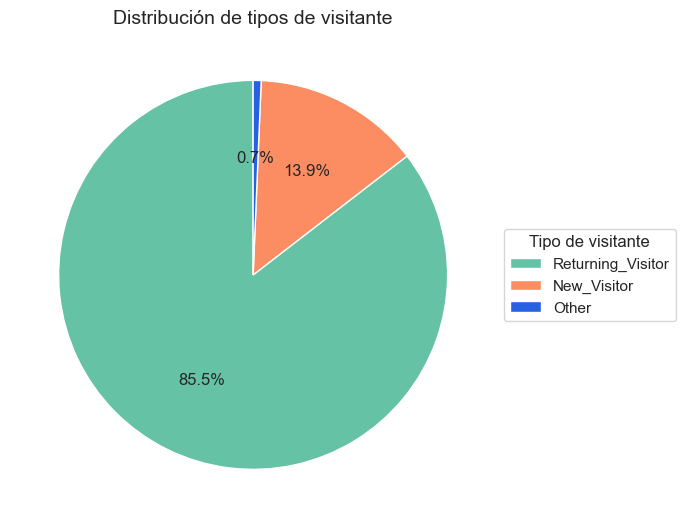

In [113]:
# Contamos frecuencia de cada tipo de visitante
counts = df_no_duplicados['VisitorType'].value_counts()

colors = ['#66c2a5', '#fc8d62', "#2860e2"]

# Gráfico
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    counts,
    labels=None,             
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
)

plt.title('Distribución de tipos de visitante', fontsize=14)

# Agregamos una leyenda con las etiquetas y colores
plt.legend(
    wedges,                   
    counts.index,             
    title='Tipo de visitante',
    loc='center left',        
    bbox_to_anchor=(1, 0, 0.5, 1)  
)

plt.tight_layout()
plt.show()


Mediante el grafico podemos concluir que nuestra hipotesis se cumple, ya que hay un 85.5%, lo que quiere decir que la mayoria de visitantes son Returning_Visitor.

*Hipotesis univariada 2:* “La mayoría de compras se realizan cuando product_related es alto”


* En caso de probarse, los sitios web podrían enfocar campañas que incentiven al usuario a mantenerse visualizando páginas (por ejemplo mostrar “ver más productos” o recomendaciones inteligentes).

* Si no se confirma, significa que navegar mucho no se traduce en compra → quizá el sitio está fallando en la parte de embudo (tiene buenas vistas pero baja conversión) y habría que revisar experiencia de checkout o ofrecimiento.

Dividimos el DataFrame 'df_no_duplicados' en dos subconjuntos disjuntos basados en la variable objetivo 'Revenue'.
Esto nos permitirá realizar un análisis comparativo directo entre las sesiones que terminaron en compra y las que no.

In [114]:
df_ventas = df_no_duplicados[df_no_duplicados['Revenue'] == True]

In [115]:
df_no_ventas = df_no_duplicados[df_no_duplicados['Revenue'] == False]

Ahora queremos identificar qué significa un valor "alto" para 'ProductRelated'. Definimos "alto" como el valor que está por encima del 75% de las sesiones que terminaron en compra (es decir, el tercer cuartil o Q3).

In [116]:
umbral = df_ventas['ProductRelated'].quantile(0.75) 

Teniendo una separación entre Product_Related "alto" y "bajo", estamos en condiciones de analizar nuestra hipotesis 2.

C:\Users\mf756\AppData\Local\Temp\ipykernel_10836\3611621638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas['Grupo'] = df_ventas['ProductRelated'].apply(


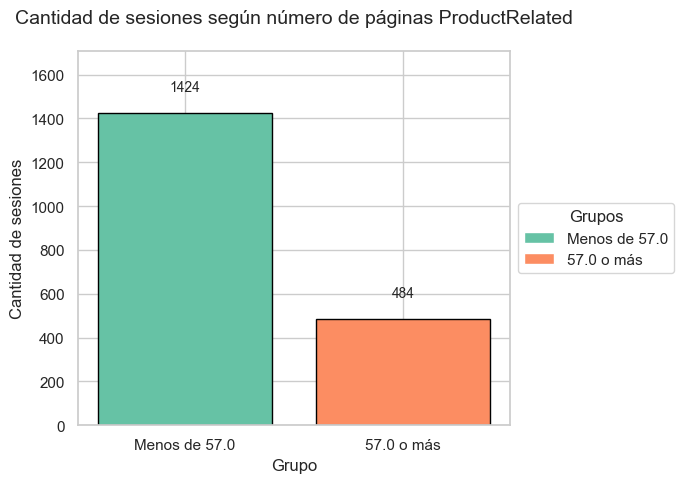

In [117]:
# Definir el valor de corte
threshold = umbral

# Crear los grupos
df_ventas['Grupo'] = df_ventas['ProductRelated'].apply(
    lambda x: f'Menos de {threshold}' if x < threshold else f'{threshold} o más'
)

# Contar cuántos hay en cada grupo
counts = df_ventas['Grupo'].value_counts()

colors = ['#66c2a5', '#fc8d62']

# Gráfico de barras
plt.figure(figsize=(7,5))
plt.bar(counts.index, counts.values, color=colors, edgecolor='black')

# Etiquetas
plt.title('Cantidad de sesiones según número de páginas ProductRelated', fontsize=14, pad=20)
plt.xlabel('Grupo')
plt.ylabel('Cantidad de sesiones')
plt.ylim(0, counts.values.max() * 1.2)


# Agregar etiquetas de cantidad arriba de cada barra
for i, value in enumerate(counts.values):
    plt.text(i, value + 100, str(value), ha='center', fontsize=10)

# Agregar leyenda
plt.legend(
    wedges,                   
    counts.index,             
    title='Grupos',
    loc='center left',        
    bbox_to_anchor=(1, 0, 0.5, 1) 
)
plt.tight_layout()
plt.show()


Como puede verse ene el grafico, la hipotesis queda refutada.

*Hipótesis Bivariada 1:* “La mayor cantidad de ventas ocurre cerca de un día especial.”


Para analizar esto, vamos a tomar un primer enfoque:
1. Filtraremos solamente las sesiones que terminaron en venta.
2. Crearemos una categoría ('Cerca' vs 'Lejos') basada en el valor de 'SpecialDay'.
3. Calcularemos qué porcentaje de las ventas totales pertenece a cada categoría.

Esto nos permitirá crear un perfil del grupo comprador y ver qué 
proporción de ellos compró en relación a un día especial.

C:\Users\mf756\AppData\Local\Temp\ipykernel_10836\202572224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas['Proximidad_Dia_Especial'] = df_ventas['SpecialDay'].apply(


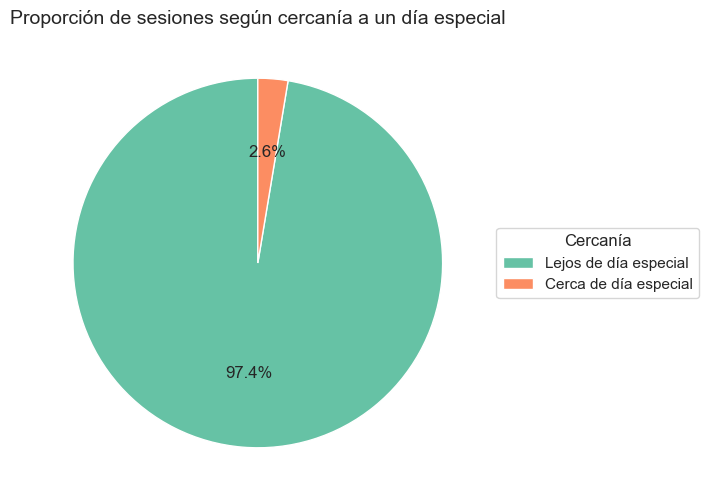

In [118]:
#Creamos una nueva columna que clasifica cada VENTA en 'Cerca' o 'Lejos' de un día especial. Usamos 0.5 como umbral.

df_ventas['Proximidad_Dia_Especial'] = df_ventas['SpecialDay'].apply(
    lambda x: 'Cerca de día especial' if x >= 0.5 else 'Lejos de día especial'
)

# Calcular porcentajes
counts = df_ventas['Proximidad_Dia_Especial'].value_counts(normalize=True) * 100

colors = ['#66c2a5', '#fc8d62']

# Graficar
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
)

# Leyenda
plt.legend(
    wedges,                   
    counts.index,             
    title='Cercanía',
    loc='center left',        
    bbox_to_anchor=(1, 0, 0.5, 1)  
)
plt.title('Proporción de sesiones según cercanía a un día especial', fontsize=14)
plt.show()


Ahora que ya vimos la composición del grupo que SÍ compró, aplicaremos el mismo análisis al grupo que NO compró.

C:\Users\mf756\AppData\Local\Temp\ipykernel_10836\2780542145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_ventas['Proximidad_Dia_Especial'] = df_no_ventas['SpecialDay'].apply(


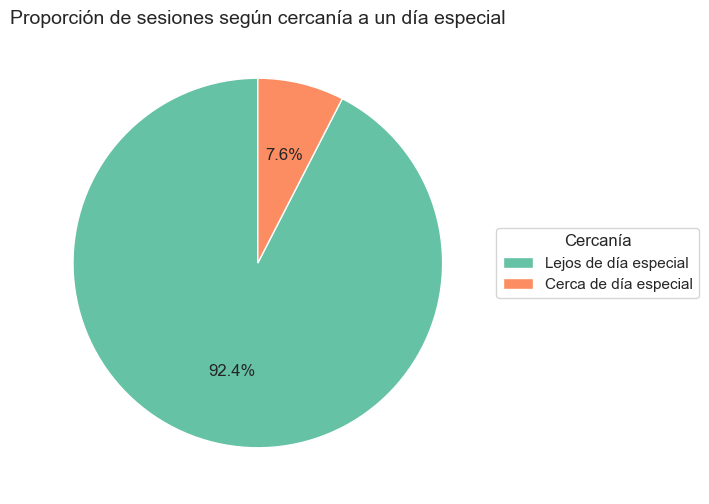

In [119]:
df_no_ventas['Proximidad_Dia_Especial'] = df_no_ventas['SpecialDay'].apply(
    lambda x: 'Cerca de día especial' if x >= 0.5 else 'Lejos de día especial'
)

# Calcular porcentajes
counts = df_no_ventas['Proximidad_Dia_Especial'].value_counts(normalize=True) * 100

colors = ['#66c2a5', '#fc8d62']

# Grafica
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
)
# Leyenda
plt.legend(
    wedges,                   
    counts.index,             
    title='Cercanía',
    loc='center left',        
    bbox_to_anchor=(1, 0, 0.5, 1)  
)
plt.title('Proporción de sesiones según cercanía a un día especial', fontsize=14)
plt.show()

Con esto podemos tener una idea de lo que estamos analizando.

Ahora comprobamos los resultados de la hipótesis con alguno de los Tests

Para saber qué tipo de test aplicar (paramétrico o no paramétrico) primero es necesario saber cómo se comporta la distribución, específicamente hay que probar dos supuestos:

El test T es una prueba paramétrica, por lo que primero debemos validar los supuestos de:

* Normalidad de los datos: a través de un test de Shapiro-Wilk o de Kolmogorov-Smirnof
* Homocedasticidad de varianzas: a través de un test de Levene o Fisher.

Para probar normalidad se puede usar Shapiro Wilks o Kolmogorov Smirnov pero se decantó por el segundo dado que a pesar de no ser tan potente como Shapiro, se ajusta mejor a conjuntos grandes de datos.

En caso de no cumplirse ningún supuesto, no se puede aplicar t-test y devemos utilizar Kruskal Wallis.

In [120]:
# Separamos los datos en dos grupos, los que terminaron en venta y los que no.
df_ventas = df_no_duplicados[df_no_duplicados['Revenue'] == True]['SpecialDay']
df_no_ventas = df_no_duplicados[df_no_duplicados['Revenue'] == False]['SpecialDay']

# Test de Kolmogorov-Smirnov para sesiones que terminaron en venta
stat, p = kstest(df_ventas, 'norm')
print(f"Test de Kolmogorov-Smirnov para sesiones que terminaron en venta: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Kolmogorov-Smirnov para sesiones que no terminaron en venta
stat, p = kstest(df_no_ventas, 'norm')
print(f"Test de Kolmogorov-Smirnov para sesiones que no terminaron en venta: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Kolmogorov-Smirnov para sesiones que terminaron en venta: Estadístico=0.500, p-valor=0.000
Test de Kolmogorov-Smirnov para sesiones que no terminaron en venta: Estadístico=0.500, p-valor=0.000


Utilizando nivel de confianza α = 0.05, el p-valor obtenido vemos que esta debajo de este nivel y por lo tanto se refuta la hipotesis nula de normalidad de los datos.

Viendo el resultado de Kolmogorov-Smirnov, utilizamos un QQ-plot para poder visualizar esta situación.

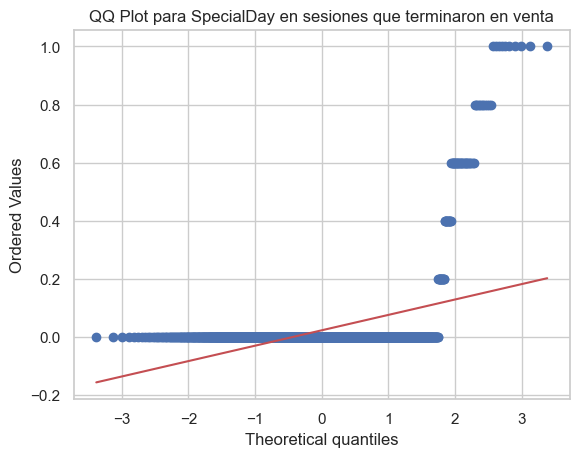

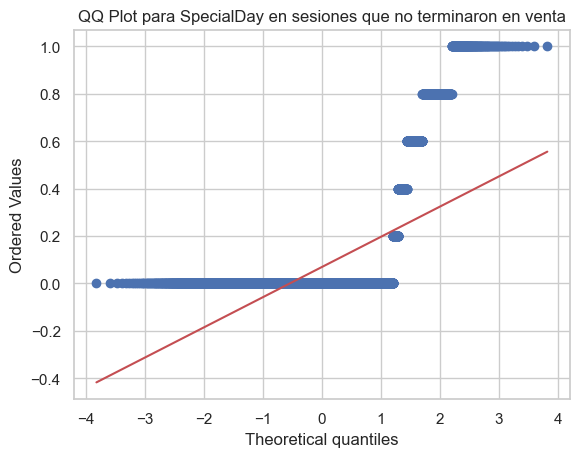

In [121]:
# QQ plot para sesiones que terminaron en venta
stats.probplot(df_ventas, dist="norm", plot=plt)
plt.title("QQ Plot para SpecialDay en sesiones que terminaron en venta")
plt.show()

# QQ plot para sesiones que no terminaron en venta
stats.probplot(df_no_ventas, dist="norm", plot=plt)
plt.title("QQ Plot para SpecialDay en sesiones que no terminaron en venta")
plt.show()

Ahora si, ¡confirmamos que las distribuciones no son normales! y por lo tanto no es posible utilizar el T-test.

Como siguiente paso queda analizar la homocedasticidad de los dato para saber que test usar para validar nuestra hipotesís. 


In [122]:
stat, p = stats.levene(df_ventas, df_no_ventas)
print(f"Test de Levene para SpecialDay: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para SpecialDay: Estadístico=85.889, p-valor=0.000


Obtuvimos un p-valor menor a 0.05, por ende tenemos datos que no son homocedasticos!. Por lo tanto, queda utilizar Kruskal-Wallis.

In [123]:
# Test de Kruskal-Wallis para comparar SpecialDay entre sesiones que terminaron en venta y las que no.
stat, p = stats.kruskal(df_ventas, df_no_ventas)
print(f"Test de Kruskal-Wallis para SpecialDay: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el SpecialDay entre sesiones que terminaron en ventas y las que no.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el SpecialDay entre sesiones que terminaron en ventas y las que no.")

Test de Kruskal-Wallis para SpecialDay: Estadístico=95.178, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el SpecialDay entre sesiones que terminaron en ventas y las que no.


En base al p-valor que devolvio el test Kruskal-Wallis: Existe una diferencia significativa en el SpecialDay entre sesiones que terminaron en ventas y las que no.
Y ayudandonos de los graficos de tortas realizados anteriormente, podemos afirmar que la hipotesis planteada en un primer momento era falsa, es decir, que la mayor cantidad de ventas no es cerca a un día especial.

Conclusión: Refutamos hipotesis!

*Hipotesis bivariada 2:* "Las sesiones que ocurren durante el fin de semana presentan un comportamiento de compras distinto al de las sesiones realizadas en días de semana."

Para probar esta hipótesis, primero vamos a renombrar los valores de la columna 'Weekend' para que sean más claros en el gráfico.
A continuación, vamos a agrupar los datos por estas dos categorías ('Día de semana' y 'Fin de semana') y calcularemos la proporción de compras (Revenue=True) y no compras (Revenue=False) dentro de cada una.

Esto nos permitirá comparar visualmente si, por ejemplo, el porcentaje de compras es mayor durante el fin de semana.

C:\Users\mf756\AppData\Local\Temp\ipykernel_10836\3572018597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicados['Weekend'] = df_no_duplicados['Weekend'].replace({


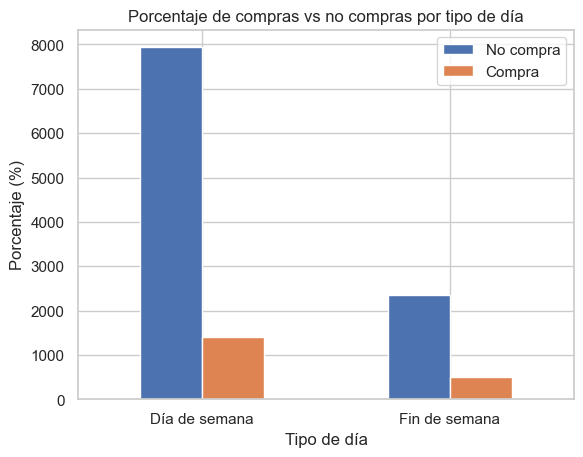

In [124]:
# Renombramos valores para que se vean lindo en el gráfico.
df_no_duplicados['Weekend'] = df_no_duplicados['Weekend'].replace({
    'weekend': 'Fin de semana',
    'weekday': 'Día de semana'
})

# Calcular porcentaje de compras y no compras dentro de cada grupo.
conteos = df_no_duplicados.groupby(['Weekend', 'Revenue']).size().unstack(fill_value=0)

# Gráfico de barras agrupadas
ax = conteos.plot(kind='bar')
ax.set_xticklabels(['Día de semana', 'Fin de semana'], rotation=0)

plt.xlabel("Tipo de día")
plt.ylabel("Porcentaje (%)")
plt.title("Porcentaje de compras vs no compras por tipo de día")
plt.xticks(rotation=0)
plt.legend(["No compra", "Compra"])
plt.show()

Considerando que ambas variables son categoricas, podriamos aplicar test Chi-cuadrado para analizar las diferencias de proporciones.

Utilizaremos test Chi-cuadrado para llevar a cabo el analisis de nuestra hipotesis.

In [125]:
# Tabla de contingencia
tabla = pd.crosstab(df_no_duplicados['Weekend'], df_no_duplicados['Revenue'])

# Test Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla)
print(f"Chi2 = {chi2:.3f}, p = {p:.5f}")

Chi2 = 9.205, p = 0.00241


La prueba de Chi-Cuadrado confirma la observación del gráfico. Dado que el valor p es significativamente menor que nuestro umbral de significancia (p < 0.05), rechazamos la hipótesis nula. Esto indica que existe una asociación estadísticamente significativa entre el tipo de día (semana vs. fin de semana) y el resultado de la sesión (compra vs. no compra), y que, por lo tanto, sus distribuciones no son iguales.

Conclusión: refutamos la hipotesis anteriormente planteada.

*Hipotesis bivariada 3:* "A mayor valor de las páginas visitadas (PageValues), más frecuente es que una sesión termine en una compra."

Para realizar el primer análisis visual de esta hipótesis, utilizaremos un gráfico de violín.
Este tipo de gráfico nos permite ver y comparar la distribución y densidad de la variable numérica ('PageValues') para cada uno de los dos grupos de la variable categórica ('Revenue': True y False).

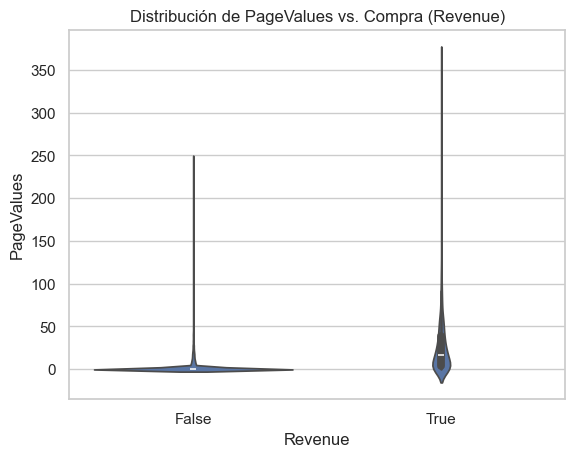

In [126]:

sns.set(style="whitegrid")

# Gráfico de violín
# x = variable categórica.
# y = variable numérica. 
sns.violinplot(data=df_no_duplicados, x='Revenue', y='PageValues')

plt.title('Distribución de PageValues vs. Compra (Revenue)')

plt.show()

Como observamos en el gráfico anterior, la enorme cantidad de sesiones con 'PageValues' igual a 0 "aplasta" la visualización e impide comparar las distribuciones de forma efectiva. Para solucionar esto, ahora crearemos una versión filtrada del gráfico.
Para ello, creamos un DataFrame temporal ('df_con_valor') que excluye todas las sesiones con 'PageValues' de 0.

Esto nos dará una visión mucho más clara de cómo se distribuyen los valores de PageValues cuando estos existen y nos permitirá comparar de forma justa el grupo 'True' vs. el 'False'.

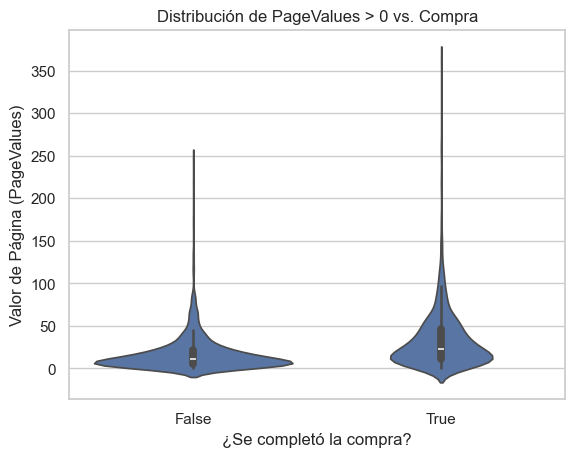

In [127]:
# 1. Crea un DataFrame filtrado
# Selecciona solo las filas donde PageValues es mayor que 0
df_con_valor = df_no_duplicados[df_no_duplicados['PageValues'] > 0]

# 2. Grafica ESE DataFrame
sns.set(style="whitegrid")
sns.violinplot(data=df_con_valor, x='Revenue', y='PageValues')

# 3. Añade títulos
plt.title('Distribución de PageValues > 0 vs. Compra')
plt.xlabel('¿Se completó la compra?')
plt.ylabel('Valor de Página (PageValues)')

# 4. Muestra el gráfico
plt.show()

El gráfico sugiere que un PageValues más alto está fuertemente asociado con una sesión que termina en compra (Revenue=True). Ahora, realizaremos una prueba estadística para confirmar si esta diferencia en las medias entre los dos grupos es estadísticamente significativa.

Aplicaremos la prueba de Shapiro-Wilk a las distribuciones de PageValues para ambos grupos (Revenue=True y Revenue=False).

In [128]:
# Separamos los datos en dos grupos, los que terminaron en venta y los que no
df_ventas = df_no_duplicados[df_no_duplicados['Revenue'] == True]['PageValues']
df_no_ventas = df_no_duplicados[df_no_duplicados['Revenue'] == False]['PageValues']

stat, p = shapiro(df_ventas)
print(f"Test de Shapiro-Wilk para sesiones que terminaron en venta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(df_no_ventas)
print(f"Test de Shapiro-Wilk para sesiones que no terminaron en venta: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sesiones que terminaron en venta: Estadístico=0.711, p-valor=0.000
Test de Shapiro-Wilk para sesiones que no terminaron en venta: Estadístico=0.227, p-valor=0.000


c:\Descargas\Facultad\fundametos Cs. Datos\trabajos practicos\TPE 2025\tpe\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10297.
  res = hypotest_fun_out(*samples, **kwds)


Como acabamos de comprobar con el test de Shapiro-Wilk, nuestras distribuciones de PageValues no son normales, por lo que rechazamos la hipótesis nula de normalidad.

A continucación verificamos el supuesto de homocedasticidad.

In [129]:
stat, p = stats.levene(df_ventas, df_no_ventas)
print(f"Test de Levene para PageValues: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para PageValues: Estadístico=3178.525, p-valor=0.000


Al rechazar la hipótesis nula de la prueba de Levene (ya que el p-value fue menor a 0.05), hemos confirmado estadísticamente que las varianzas de PageValues no son iguales entre el grupo que compra (Revenue=True) y el que no compra (Revenue=False).

Dado que no cumple con ninguno de los supuestos que se necesitan para realizar la comparación de estos grupos mediante t-test, recurrimos al test de Kruskal-Wallis.


In [130]:
# Test de Kruskal-Wallis para comparar PageValues entre sesiones que terminaron en venta y las que no.
stat, p = stats.kruskal(df_ventas, df_no_ventas)
print(f"Test de Kruskal-Wallis para Pagevalues: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.05 
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el PageValues entre sesiones que terminaron en ventas y las que no.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el PageValues entre sesiones que terminaron en ventas y las que no.")

Test de Kruskal-Wallis para Pagevalues: Estadístico=4777.943, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el PageValues entre sesiones que terminaron en ventas y las que no.


Gracias a este resultado, rechazamos la hipótesis nula y confirmamos que existe una diferencia estadísticamente significativa en el comportamiento de PageValues entre las sesiones que terminaron en compra y las que no.

En base a esto y al gráfico de violín, se valida la hipótesis: en las sesiones donde la compra ocurrió, el PageValues tendía a tomar valores más altos, mientras que en las sesiones que no terminaron en compras, sus PageValues estaban concentrados cerca del 0.

*Hipotesis multivariada:* "Es posible diferenciar perfiles de comportamiento de usuario basándose únicamente en sus métricas numéricas de navegación (actividad, duración, tasas de rebote, valor de página y día especial)."

In [131]:
df_numericas = df_no_duplicados.drop(columns=["Month", "VisitorType", "Weekend","Browser","Region","TrafficType","OperatingSystems","Revenue"])

Estandarizamos los variables numericas.

In [132]:
# Seleccionamos las columnas numéricas para la normalización.
numeric_cols = df_numericas.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler.
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos.
df_numericas[numeric_cols] = scaler.fit_transform(df_numericas[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados.
df_numericas.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0


Mediante Elbow plot analizamos que valor de K es optimo para el analisis

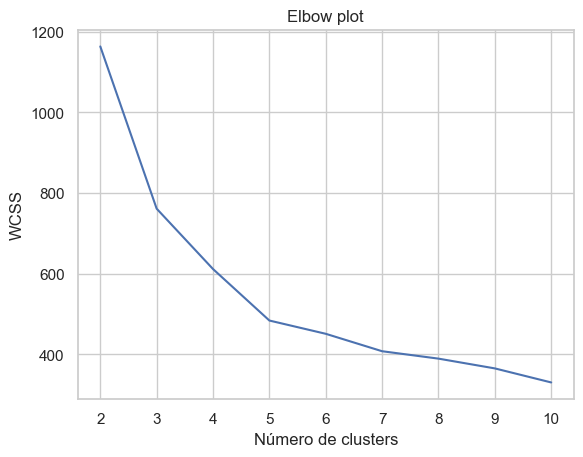

In [133]:
# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor.
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_numericas)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot.
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

5 es el mejor numero!!!!!!!!

In [134]:
# inicializamos un objeto de la clase KMeans con el modelo.
kmeans = KMeans(n_clusters=5, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides.
kmeans.fit(df_numericas)
# y obtenemos los clusters a los que fueron asignadas las muestras.
clusters_kmeans = kmeans.predict(df_numericas)
print(clusters_kmeans)

[0 1 0 ... 1 4 1]


In [135]:
# Creamos un DataFrame con los clusters asignados.
cluster_df = pd.DataFrame({'Cluster': clusters_kmeans})

# Imprimimos los cluster.
for cluster_num in range(4):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df['Cluster'].tolist())


Cluster 0:
[0, 1, 0, 1, 1, 4, 0, 0, 2, 2, 1, 2, 4, 1, 1, 4, 0, 4, 1, 4, 2, 0, 4, 2, 0, 4, 4, 1, 4, 2, 1, 1, 4, 1, 4, 4, 1, 2, 2, 4, 4, 2, 4, 2, 4, 4, 1, 1, 4, 0, 0, 4, 2, 1, 2, 0, 0, 4, 2, 2, 2, 1, 3, 4, 0, 2, 4, 0, 4, 0, 0, 1, 2, 4, 1, 4, 3, 2, 0, 0, 4, 2, 4, 1, 0, 0, 1, 1, 2, 4, 2, 0, 1, 4, 2, 1, 1, 2, 2, 4, 2, 2, 2, 2, 4, 0, 2, 1, 2, 3, 2, 0, 0, 4, 4, 4, 2, 4, 1, 1, 4, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 4, 0, 2, 2, 4, 4, 1, 1, 4, 0, 4, 4, 0, 4, 2, 4, 4, 4, 2, 4, 0, 0, 4, 4, 1, 0, 2, 2, 4, 4, 2, 2, 4, 4, 1, 1, 2, 2, 4, 2, 0, 2, 4, 4, 4, 2, 4, 0, 0, 2, 4, 4, 4, 3, 3, 4, 0, 1, 4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4, 1, 0, 4, 4, 1, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 0, 1, 1, 4, 4, 3, 4, 4, 4, 0, 4, 1, 4, 4, 4, 4, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 0, 4, 3, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 1, 1, 1, 4, 4, 4, 1, 1, 4, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 0, 4, 

t-SNE

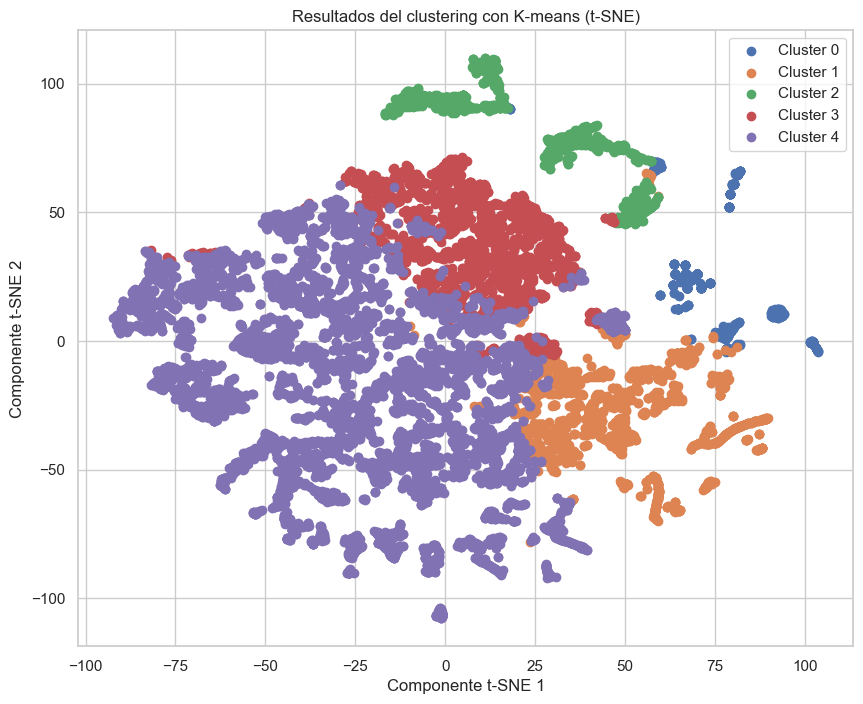

In [136]:
# Reducimos la dimensionalidad de los datos usando t-SNE.
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_numericas)

# Creamos un DataFrame con los resultados de t-SNE y los clusters.
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans})

# Graficamos los resultados de t-SNE, coloreando los puntos según el cluster.
plt.figure(figsize=(10, 8))
for cluster_num in range(5):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

Ahora para cada cluster, analizamos sus centroides para poder inferir en el comportamiento de los mismos.

In [137]:
df_copia_numericas = df_numericas.copy()
df_copia_numericas['Cluster'] = kmeans.labels_

In [138]:
lista_columnas_numericas = df_numericas.columns.tolist()
centroids = df_copia_numericas.groupby('Cluster')[lista_columnas_numericas].mean().T
print(centroids)

Cluster                         0         1         2         3         4
Administrative           0.000877  0.020216  0.048360  0.303932  0.050652
Administrative_Duration  0.000254  0.006300  0.011645  0.084979  0.013910
Informational            0.000406  0.005692  0.013137  0.065894  0.014602
Informational_Duration   0.000000  0.003232  0.008435  0.047184  0.008107
ProductRelated           0.003358  0.015992  0.041937  0.102668  0.040028
ProductRelated_Duration  0.000542  0.007142  0.016091  0.042822  0.016700
BounceRates              0.927619  0.163890  0.095474  0.027628  0.023428
ExitRates                0.958130  0.403431  0.229474  0.091463  0.113180
PageValues               0.000000  0.002878  0.006353  0.025873  0.019973
SpecialDay               0.089415  0.009715  0.687049  0.004421  0.002846


Normalizamos los centroides para poder visualizarlos mediante grafico Radar.

In [139]:
scaler = MinMaxScaler()
centroids_scaled = scaler.fit_transform(centroids.T)

centroids_scaled = pd.DataFrame(centroids_scaled, 
                                index=centroids.columns, 
                                columns=centroids.index).T

print(centroids_scaled)

Cluster                         0         1         2         3         4
Administrative           0.000000  0.063815  0.156683  1.000000  0.164245
Administrative_Duration  0.000000  0.071359  0.134449  1.000000  0.161186
Informational            0.000000  0.080717  0.194399  1.000000  0.216770
Informational_Duration   0.000000  0.068502  0.178762  1.000000  0.171815
ProductRelated           0.000000  0.127215  0.388470  1.000000  0.369240
ProductRelated_Duration  0.000000  0.156090  0.367765  1.000000  0.382167
BounceRates              1.000000  0.155345  0.079680  0.004645  0.000000
ExitRates                1.000000  0.359962  0.159243  0.000000  0.025058
PageValues               0.000000  0.111249  0.245564  1.000000  0.771963
SpecialDay               0.126526  0.010039  1.000000  0.002302  0.000000


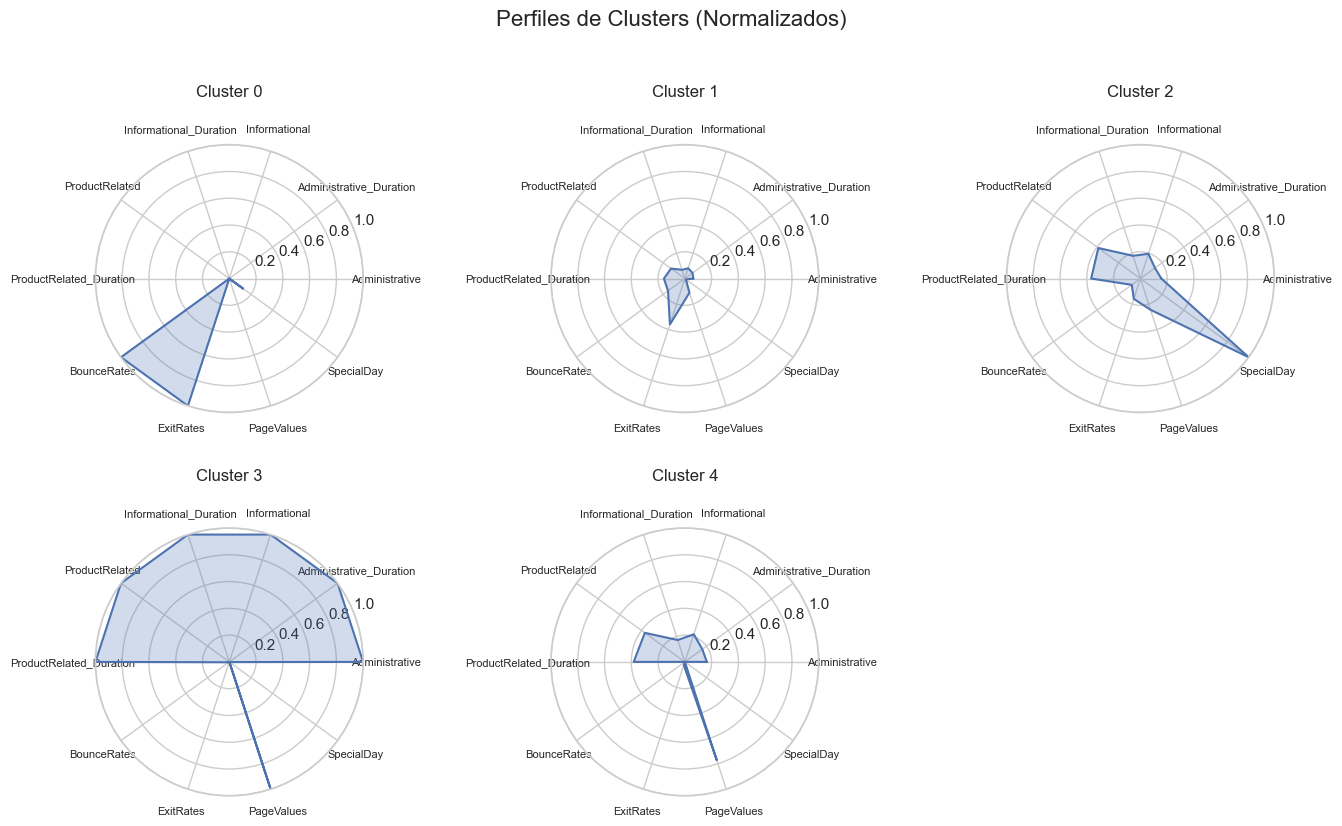

In [140]:
# Asumimos que 'centroids_scaled' ya existe y está normalizado.

# 1. Nombres de las características
labels = centroids_scaled.index.tolist()
num_vars = len(labels)

# 2. Calcula los ángulos para cada eje.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 3. Cierra el círculo
angles += angles[:1]

# --- 1. Crear la "Plantilla" (Grilla) ---
# Vamos a crear una grilla de 2 filas x 3 columnas.
# fig = La figura completa
# axes = Un array (matriz) con los 6 "lienzos" para dibujar
fig, axes = plt.subplots(nrows=2, ncols=3, 
                         figsize=(14, 8), 
                         subplot_kw=dict(polar=True))

# --- 2. Iterar sobre cada Cluster y dibujarlo en su 'ax' ---
# .flatten() convierte la matriz de 2x3 en una lista simple de 6
# zip() nos permite recorrer los 'axes' y los clusters al mismo tiempo
for ax, cluster in zip(axes.flatten(), centroids_scaled.columns):
    
    # --- Tomar los datos (igual que antes) ---
    values = centroids_scaled[cluster].tolist()
    values += values[:1] # Cierra el círculo
    
    # --- Dibujar en el 'ax' específico ---
    
    # Dibujar la línea
    ax.plot(angles, values, linewidth=1.5, linestyle='solid')
    
    # Rellenar el área
    ax.fill(angles, values, alpha=0.25)
    
    # --- Formatear CADA gráfico ---
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8) # Achicamos la letra
    ax.set_title(f"Cluster {cluster}", size=12, y=1.15)
    
    # MUY IMPORTANTE: Fijar el límite Y de 0 a 1
    # Esto asegura que todos los gráficos usen la misma escala
    # y podamos compararlos visualmente.
    ax.set_ylim(0, 1)

# --- 3. Limpieza ---

# "Apagamos" el último eje que no usamos (la 6ta celda)
fig.delaxes(axes[1, 2])

# Ajusta el espaciado para que no se superpongan los títulos
plt.tight_layout(pad=2.0)

# Título general de la figura
fig.suptitle('Perfiles de Clusters (Normalizados)', fontsize=16, y=1.05)

plt.show()